In [53]:
#Decision Tree and Support Vector Machine  to identify fraudulent credit card transactions
#Binary classification: fraud(1), not-fraud(0)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

data=pd.read_csv(r"C:\Users\acer\Downloads\kaggle datasets\credit_card datasets\creditcard.csv")
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [54]:
#output shows; Target variable as "Class" and 30 other columns
labels=data.Class.unique()    #shows unique values in Class column
print(labels)          #output shows [0,1] i.e there are only two unique values in Class column

[0 1]


In [55]:
shapes=data.shape         #gives no of rows and no of columns     
result_data=data.Class.value_counts().values   #just give the frequency of values
result=data.Class.value_counts() #mention the unique values with their frequency
print(shapes)
print(result_data)
print(result)

(284807, 31)
[284315    492]
Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_225864\2504854564.py:2: MatplotlibDeprecationWarning: Passing the explode parameter of pie() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes.pie(result_data, labels,autopct='%1.2f%%')


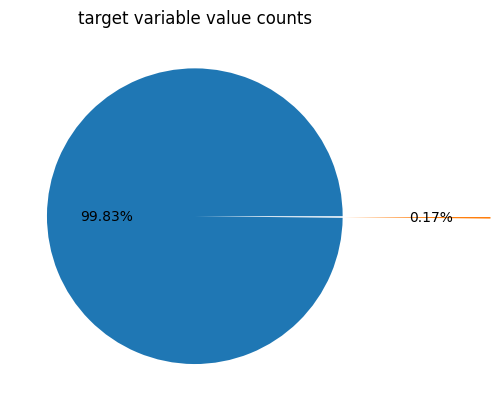

In [56]:
fig,axes= plt.subplots()   #subplot returns two values: figure,axes
axes.pie(result_data, labels,autopct='%1.2f%%')
axes.set_title("target variable value counts")
plt.show()

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64
Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20

<Axes: >

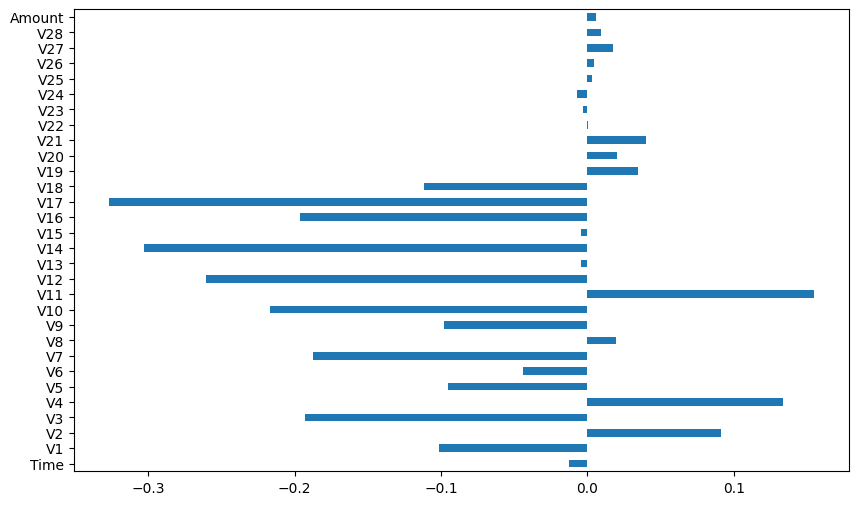

In [57]:
correlation=data.corr()["Class"]  #shows relation of class with class as well
correlation_values=data.corr()["Class"].drop("Class")  #drops class for corelation
print(correlation)
print(correlation_values)
correlation_values.plot(kind='barh',figsize=(10,6))#plots horizontal bar

In [58]:
data.iloc[: ,1:30]= StandardScaler().fit_transform(data.iloc[:, 1:30])
data_matrix=data.values  #converts dataframe to numpy array without any labels and headers
print(data_matrix)
X=data_matrix[:,1:30]
y=data_matrix[:, 30]
X = normalize(X, norm="l1")
print("these values ar X\n",X)
print("value of y is\n",y)


[[ 0.00000000e+00 -6.94242321e-01 -4.40749246e-02 ... -6.37811507e-02
   2.44964263e-01  0.00000000e+00]
 [ 0.00000000e+00  6.08496328e-01  1.61175920e-01 ...  4.46075177e-02
  -3.42474541e-01  0.00000000e+00]
 [ 1.00000000e+00 -6.93500463e-01 -8.11577826e-01 ... -1.81020827e-01
   1.16068593e+00  0.00000000e+00]
 ...
 [ 1.72788000e+05  9.80023736e-01 -1.82433725e-01 ... -8.04671974e-02
  -8.18393021e-02  0.00000000e+00]
 [ 1.72788000e+05 -1.22755392e-01  3.21250341e-01 ...  3.16686777e-01
  -3.13248531e-01  0.00000000e+00]
 [ 1.72792000e+05 -2.72330934e-01 -1.14898979e-01 ...  4.13499858e-02
   5.14355311e-01  0.00000000e+00]]
these values ar X
 [[-0.05617142 -0.00356612  0.13534477 ...  0.02677257 -0.00516056
   0.01982016]
 [ 0.0617268   0.01634993  0.01113799 ... -0.00225765  0.00452505
  -0.03474114]
 [-0.02686875 -0.0314435   0.0453095  ... -0.00531318 -0.00701341
   0.04496923]
 ...
 [ 0.0576644  -0.01073436 -0.12610577 ...  0.0006494  -0.00473467
  -0.00481541]
 [-0.00560415  0

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
w_train = compute_sample_weight('balanced', y_train) #value 0 appears repetedly and value 1 occurs sometime. so to balance weight between them
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=35) #tree grows up to 4 levels
decision_tree.fit(X_train, y_train, sample_weight=w_train)
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
svm.fit(X_train, y_train)
y_pred_dt = decision_tree.predict_proba(X_test)[:,1]
print(y_pred_dt)


[0.98878056 0.06422603 0.06422603 ... 0.06422603 0.09930896 0.06422603]


In [60]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))  #receiver operating charactersitics curve(metric of model performance)
#highet this score better the model is.

Decision Tree ROC-AUC score : 0.939


In [61]:
y_pred_svm = svm.decision_function(X_test)
print(y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

[24.56330654 -0.42963895 -1.05986296 ... -0.51281142 -0.26505244
 -0.99170395]
SVM ROC-AUC score: 0.986


In [62]:
#ROC-AUC score of SVM method is higher than Decision Tree Method. so SVM method is good at predicting here.